# Pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('datasets/dataset.xlsx')


In [3]:
df=data.copy()

In [4]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Creating sub-categories (following EDA)

In [5]:
# Missing rate is the percentage pf NaN values in each column
missing_rate = df.isna().sum()/df.shape[0]

In [6]:
# keeping only the columns that are valuable to our study
blood_columns = list(df.columns[(missing_rate < 0.9) &(missing_rate > 0.88)])
viral_columns = list(df.columns[(missing_rate < 0.80)&(missing_rate > 0.75)])

In [7]:
key_columns = ['Patient age quantile','SARS-Cov-2 exam result']

In [56]:
df = df[key_columns + blood_columns] #+ viral_columns]
df.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
0,13,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073
2,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## TrainTest-Cleaning-Encoding

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [11]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [12]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

### Categories

In [13]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

## Encoding

In [14]:
code = {
    'positive':1,
    'negative':0,
    'detected':1,
    'not_detected':0
}

In [15]:
for col in df.select_dtypes('object'):
    df[col]=df[col].map(code)

In [16]:
# We can define a function to do the job
def encoding(df):
    code = {
        'positive':1,
        'negative':0,
        'detected':1,
        'not_detected':0
    }
    for col in df.select_dtypes('object'):
        df[col]=df[col].map(code)
    return df


In [67]:
def feature_engineering(df):
    df['is sick'] = df[viral_columns].sum(axis=1) >=1
    df=df.drop(viral_columns,axis=1)
    return df

In [44]:
def imputation(df):
    #df['is na']=(df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    #df = df.fillna(-999)
    df = df.dropna(axis=0)
    return df

In [68]:
def preprocessing(df):
    df=encoding(df)
    df = feature_engineering(df)
    df=imputation(df)

    X = df.drop('SARS-Cov-2 exam result',axis=1)
    y = df['SARS-Cov-2 exam result']

    print(y.value_counts())
    return  X,y

In [69]:
X_train, y_train = preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


In [70]:
X_test,y_test = preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


## Modeling

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import  make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [104]:
#model = DecisionTreeClassifier(random_state=0)
#model = RandomForestClassifier(random_state=0)
model = make_pipeline(
    PolynomialFeatures(2),
    SelectKBest(f_classif, k=5),
    RandomForestClassifier(random_state=0)
)

## Evaluation procedure

In [105]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import  learning_curve

In [106]:
def evaluation(model):
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)

    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))

    N,train_score, val_score =learning_curve(model, X_train,y_train,cv=4,scoring='f1', train_sizes=np.linspace(0.1,1,10))

    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='Train score')
    plt.plot(N, val_score.mean(axis=1), label='Validation score')
    plt.legend()

In [108]:
#Removing enoying warnings
import warnings
warnings.filterwarnings('ignore')

[[90  5]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        95
           1       0.50      0.31      0.38        16

    accuracy                           0.86       111
   macro avg       0.70      0.63      0.65       111
weighted avg       0.83      0.86      0.84       111



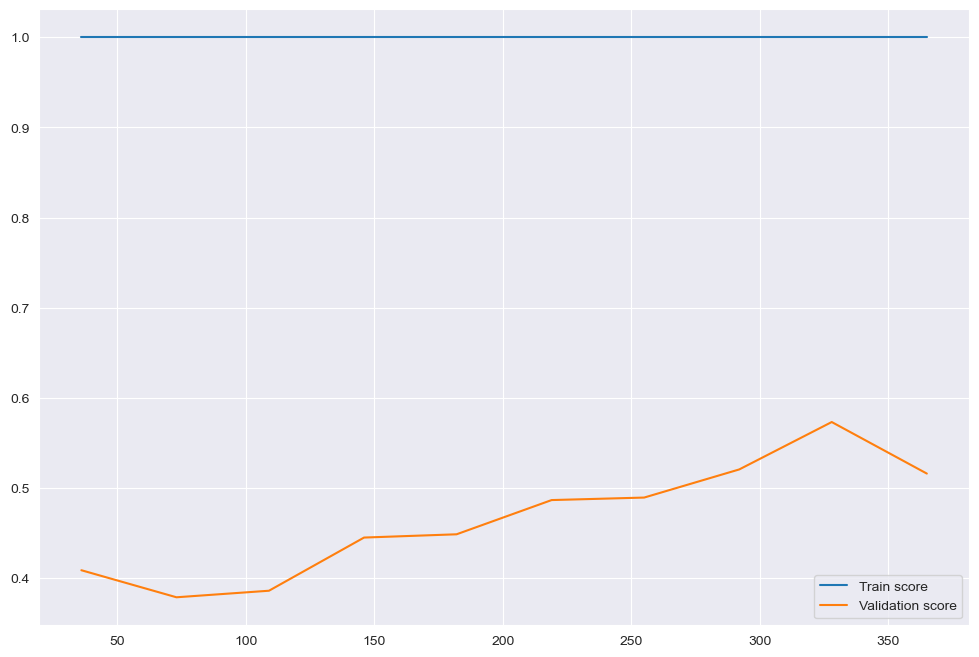

In [109]:
evaluation(model)

In [ ]:
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar()